In [ ]:
"""
An example of a custom loss function for DL models. This framework can be integrated into other workflows as needed.

Boston housing data will be used as an example case for regression.

Huber loss is a robust loss function for regression tasks that is less sensitive to outliers.

It should be noted that this is an example workflow for teaching purposes and exploratory analyses. More detailed and integrated 
pipelines are typically created for MLOps.

"""

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

from sklearn.metrics import classification_report,confusion_matrix,r2_score,mean_squared_error,mean_absolute_error

In [12]:
#Helper functions

def reg_model_eval(history,epochs):

  """
  A regression model evaluation using history and epoch parameters

  #Arguments 
    history (keras obj) - keras history object
    epochs  (keras obj) - keras epcohs object 
  #Returns
    training an dvalidation plots for regression analysis
  """
  #NOTE due to train and validation set calculation specifics epochs need to be shifted by 0.5 according to some ML practitioners
  #Assess this based on your plots if that is necessary
  plt.plot(epochs,history['mean_squared_error'],'b-',label="Train MSE")
  plt.plot(epochs,history['val_mean_squared_error'],'r-',label="Validation MSE")
  plt.legend()
  plt.show()

  plt.plot(epochs,history['mean_absolute_error'],'b-',label="Train MAE")
  plt.plot(epochs,history['val_mean_absolute_error'],'r-',label="Validation MAE")
  plt.legend()
  plt.show()
  return


from sklearn.model_selection import StratifiedShuffleSplit
from pandas.api.types import is_numeric_dtype
import pandas as pd


def stratified_split(data:pd.DataFrame,target: pd.DataFrame):

    """
    Function takes data as a dataframe and a variable as a string value to perform a stratified split.

    Test set size is 20%

    data, pd.DataFrame - data to be split
    target, array - target data which is used for splitting
    """

    data=data.copy()

    
    #If categorical value is already in place use that to split the data

    split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)

    #Target values are used for the splitting
    for train_idx,test_idx in split.split(data,target):


      X_train=data.iloc[train_idx,:]
      y_train=target[train_idx]

      X_test=data.iloc[test_idx,:]
      y_test=target[test_idx]

    return X_train, X_test,y_train,y_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

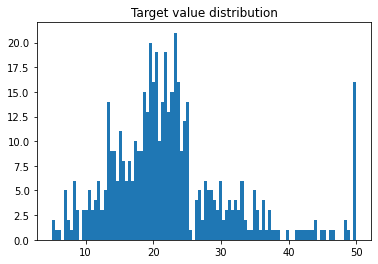

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

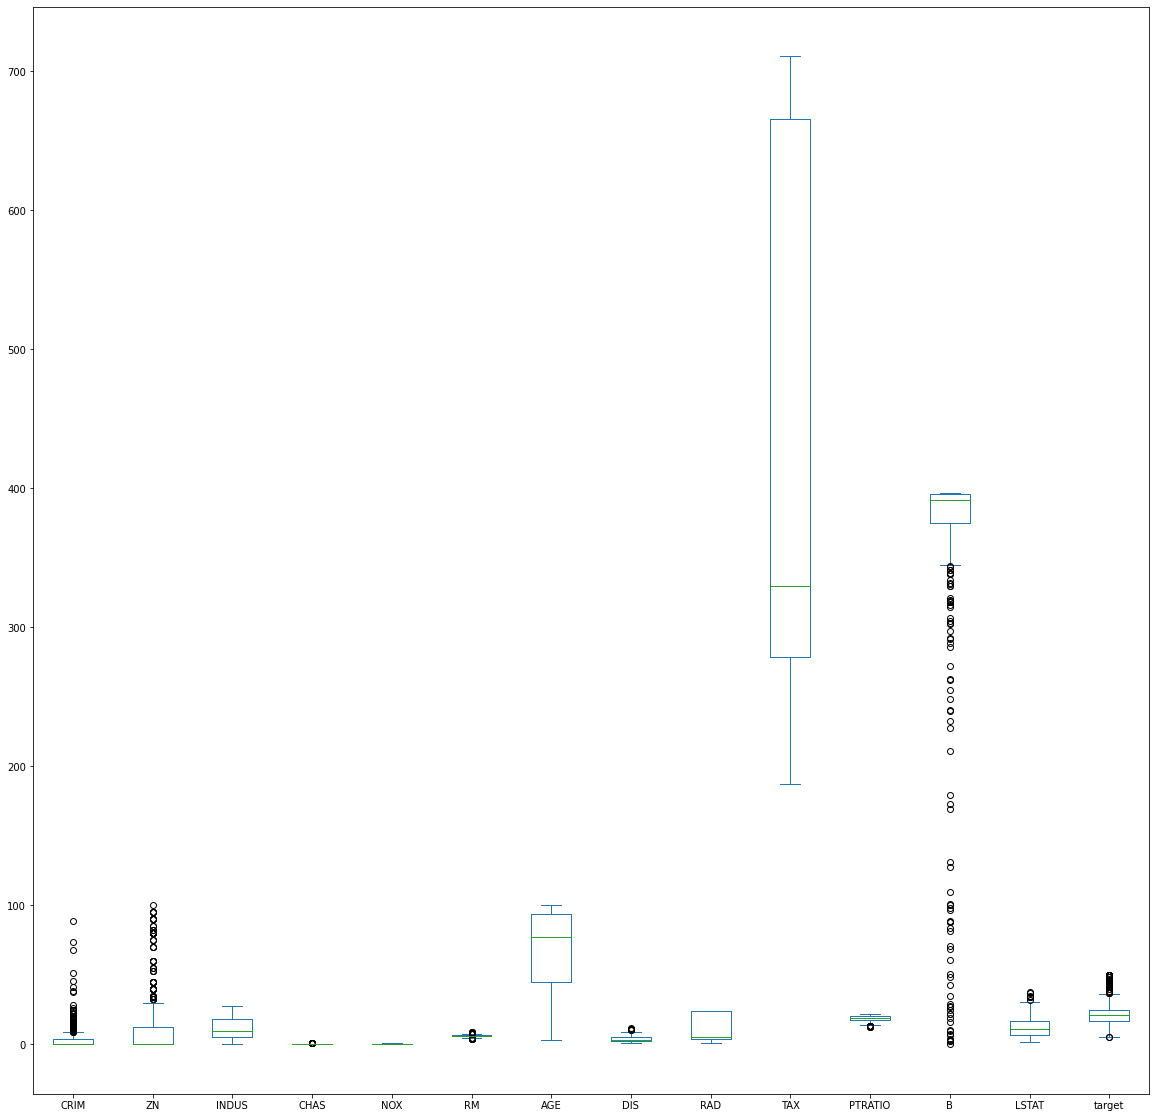

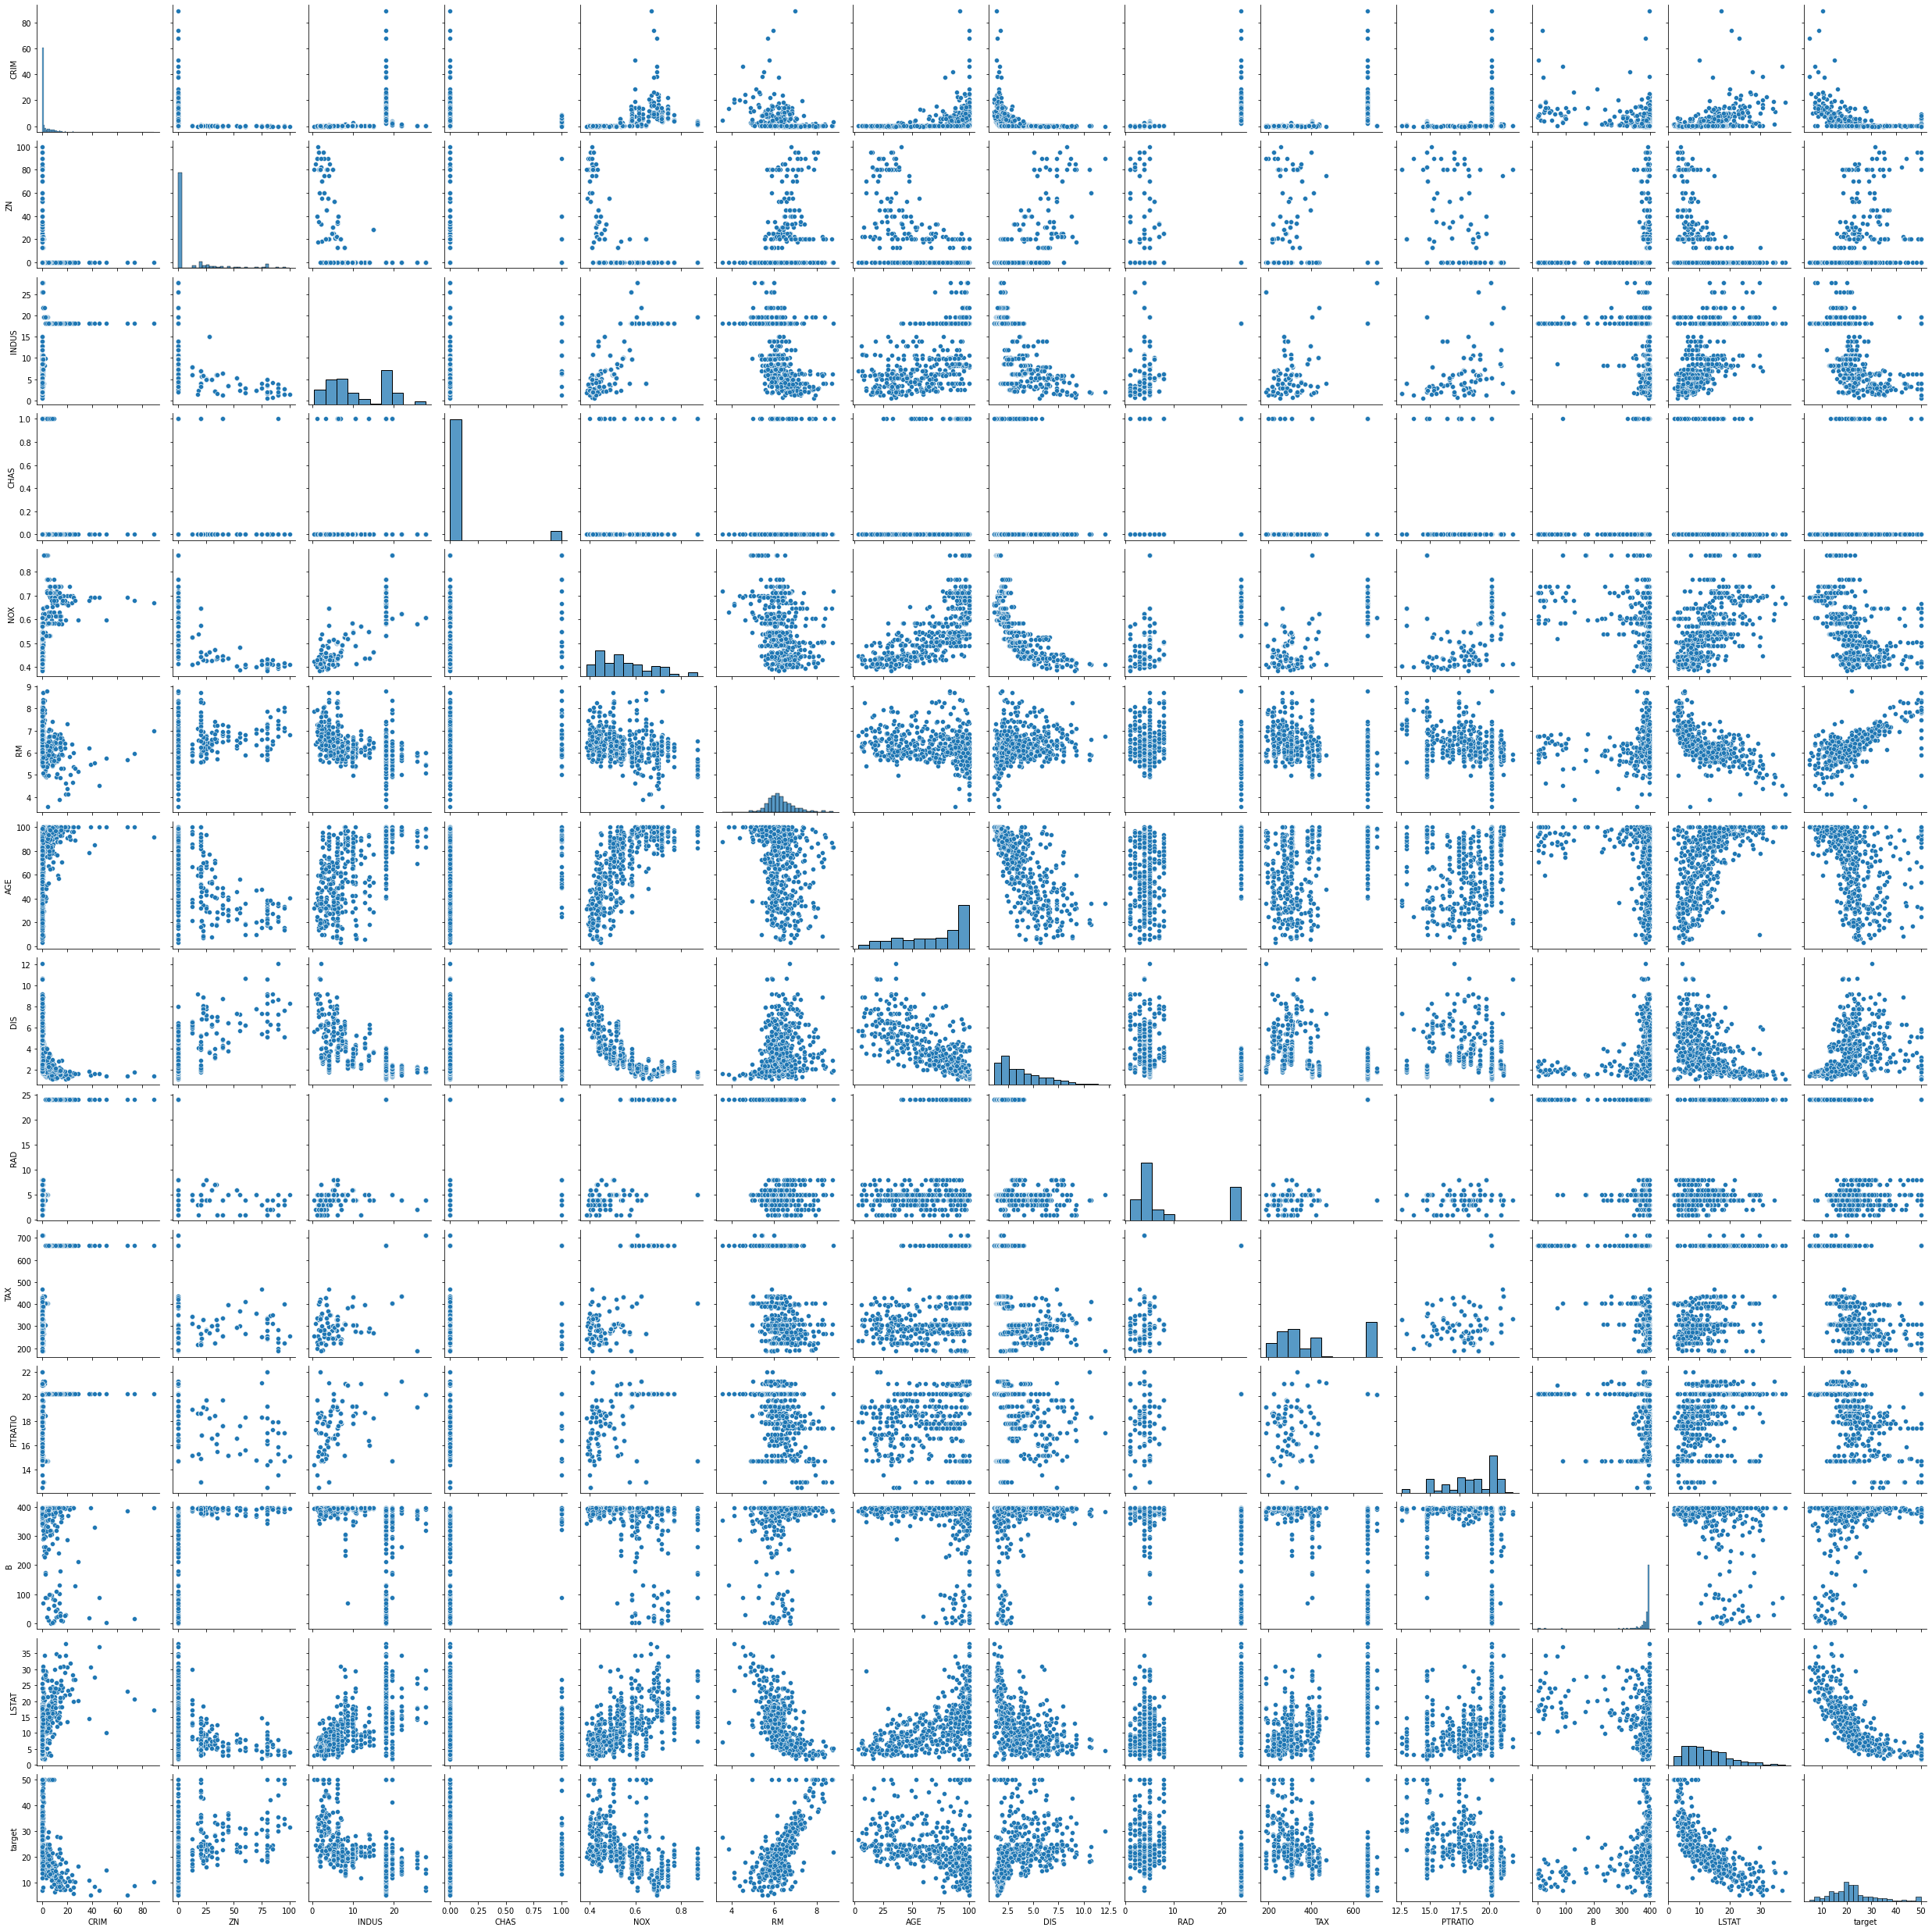

In [3]:
#Load data

data_boston=load_boston()

data=pd.DataFrame(data=data_boston.data,columns=data_boston.feature_names)
target=data_boston.target

#Check the data (high level overview)
#NOTE you should build a separate custom set of functions for data integrity checks and EDA

plt.hist(target,bins=100)
plt.title("Target value distribution")
plt.show()

df=data.copy()
df['target']=target
print(df.describe(),"\n")

print(data.head(),"\n")

df.plot.box(figsize=(20,20))
plt.show()

sns.pairplot(df,diag_kind='hist')
plt.show()

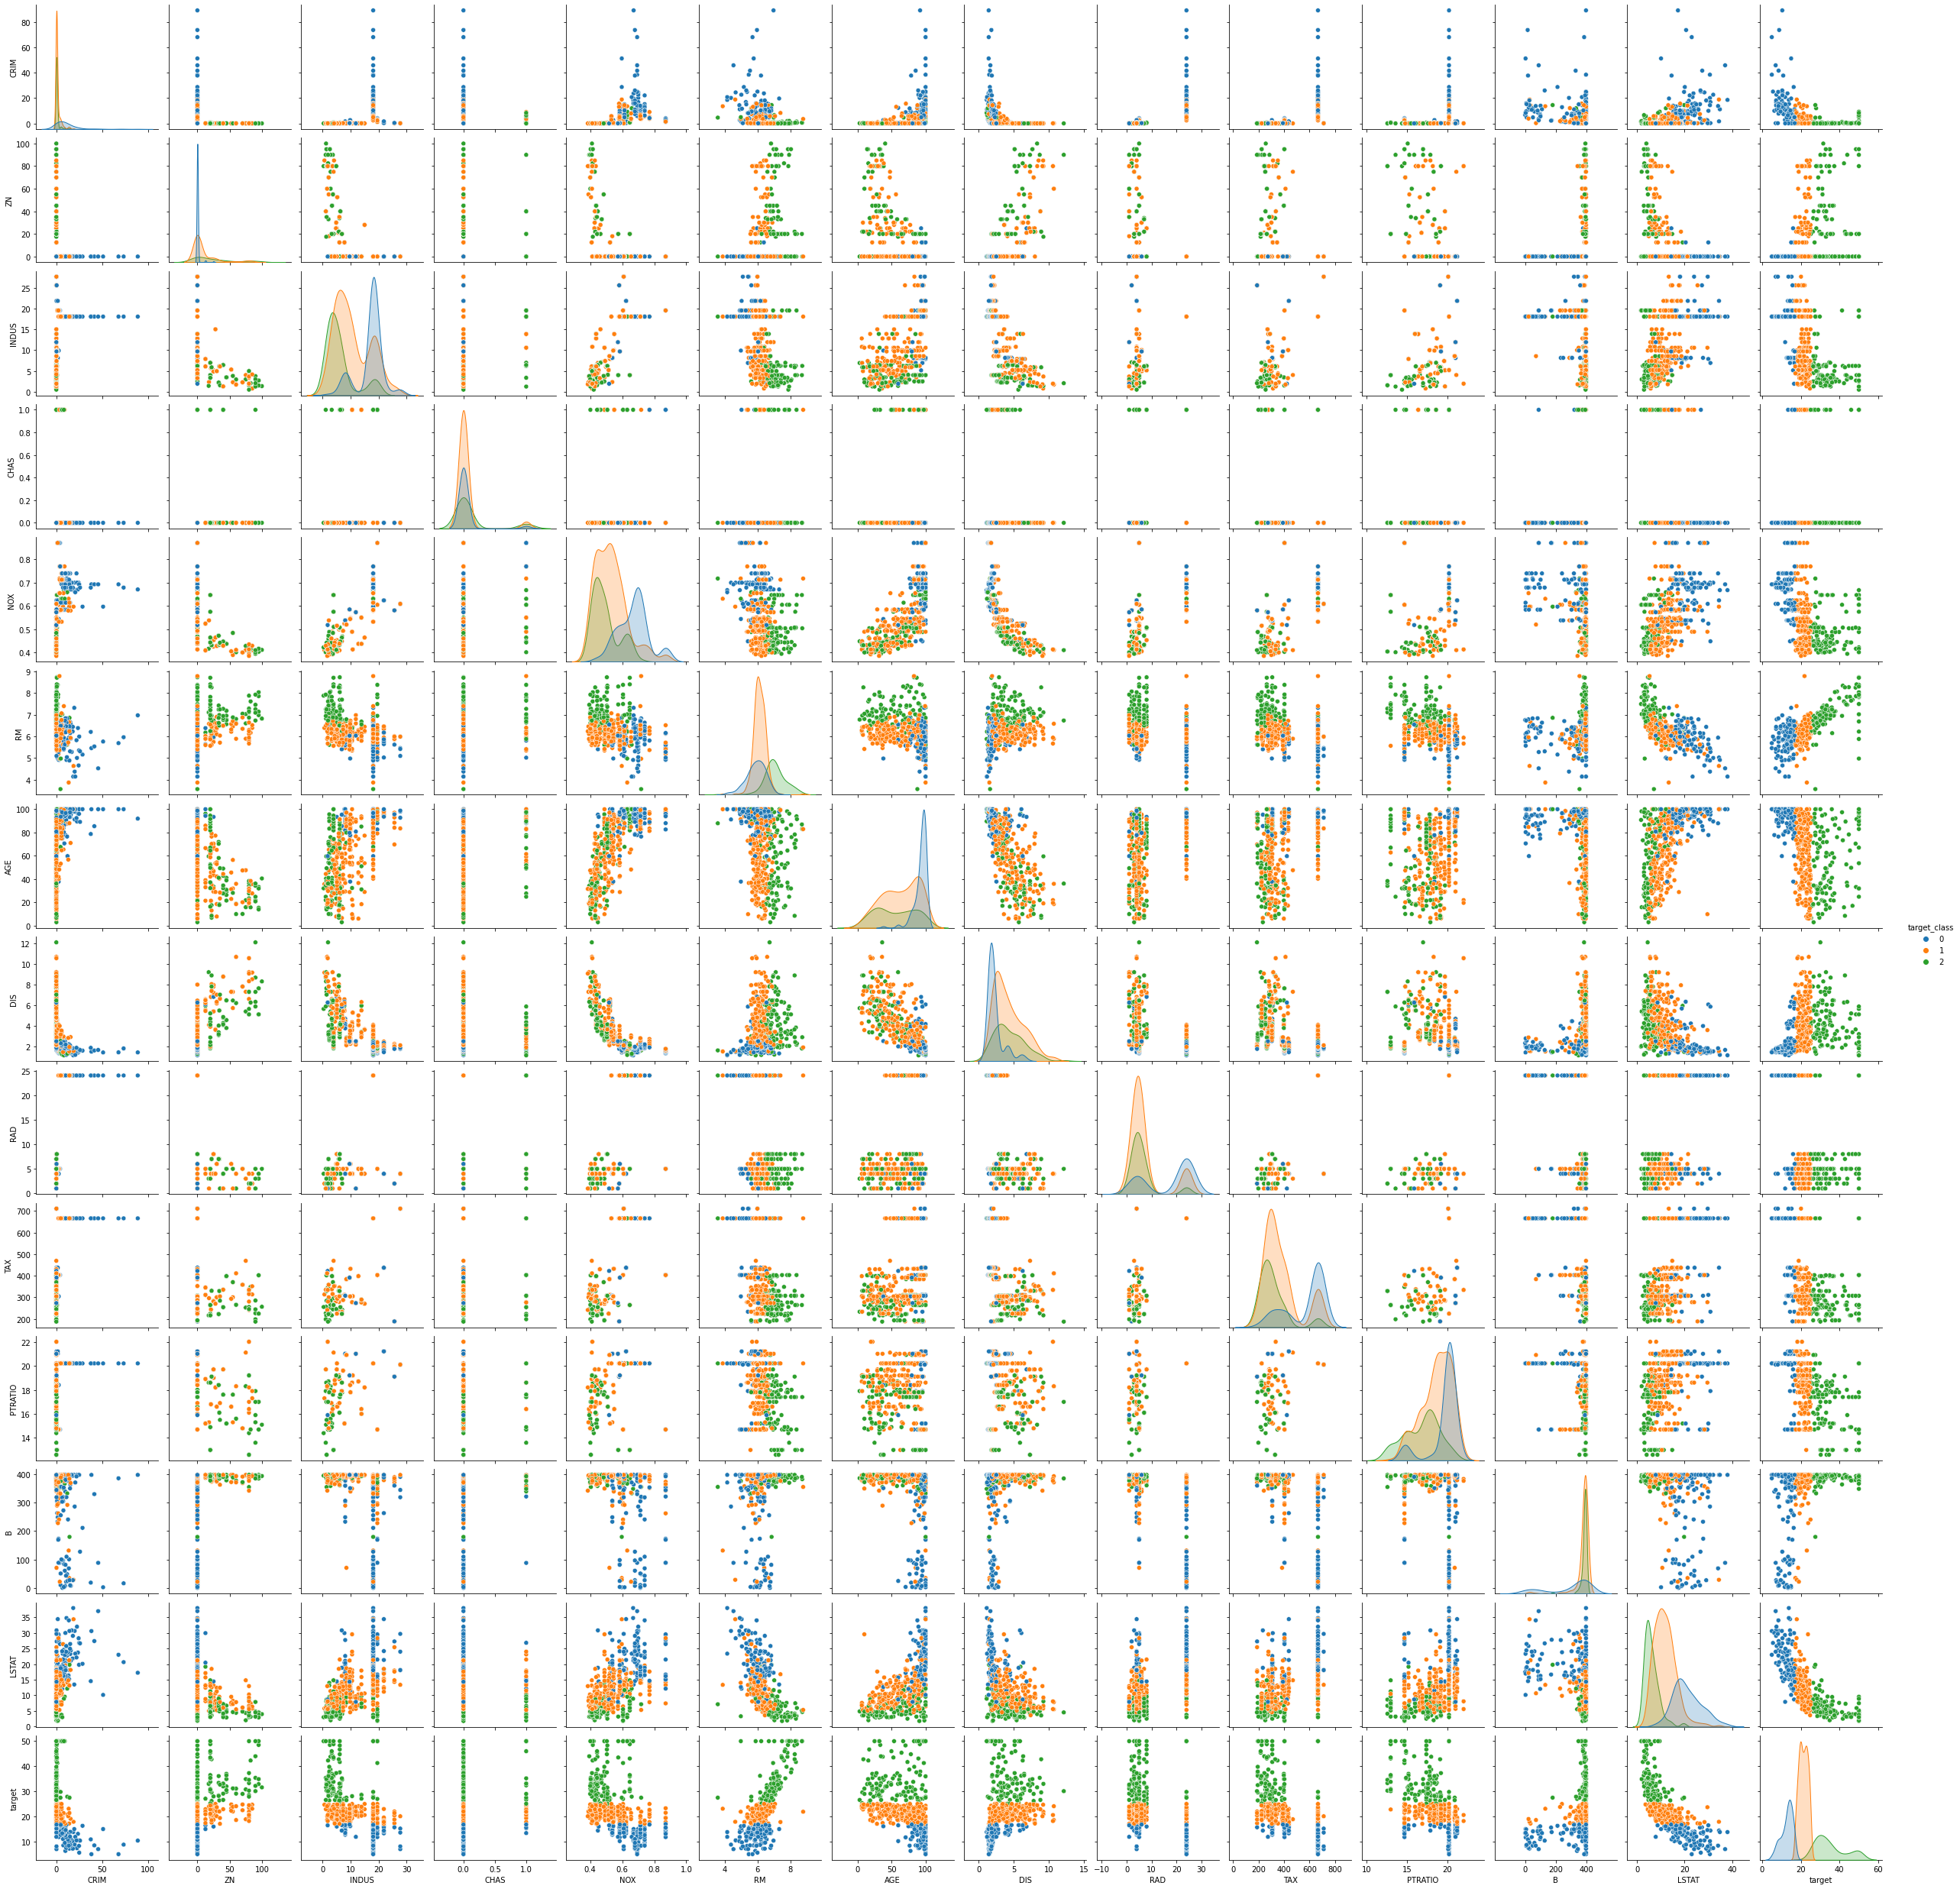

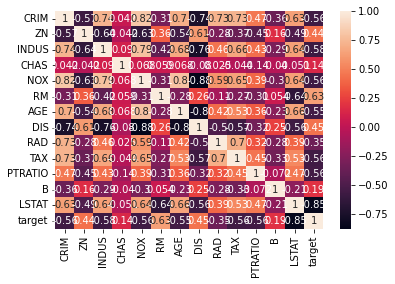

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Empty DataFrame
Columns: [target, target_class]
Index: []

In [7]:
#Check how data distributes when we set specific categories. That is low(0), medium(1) and high(2) values.
#For demonstration purposes we are selecting a simple model split.
target_class=pd.qcut(target,q=[0.0,0.25,0.75,1.0],labels=[0,1,2])

df['target_class']=target_class

#Use pairplots to quickly evaluate any dependencies or cutoffs in the data

sns.pairplot(df,diag_kind='kde',hue='target_class')
plt.show()

#Check for value correlation
sns.heatmap(df.corr(method='spearman'),annot=True)
plt.show()

print(df.describe())

targets_df=pd.DataFrame(target,columns=['target'])
targets_df['target_class']=np.array(target_class,dtype='float32')
targets_df.head()

targets_df[targets_df['target_class'].isna()]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


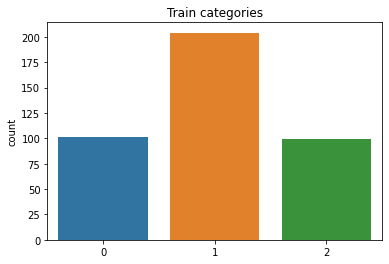

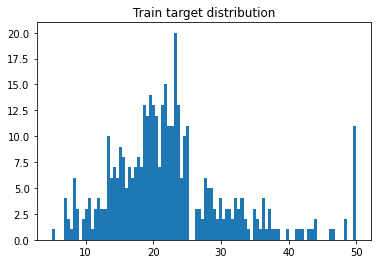

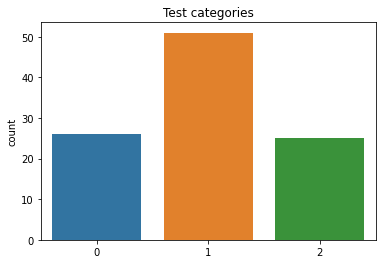

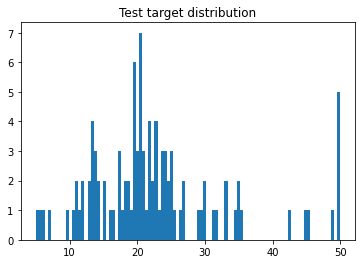

In [23]:
#Consider a stratified split using synthetic categories to better optimise for regression
split_data=data.copy()
split_data['target']=target
X_train,X_test,y_train,y_test=stratified_split(split_data,target_class)

#Evaluate how the data was split
sns.countplot(y_train)
plt.title("Train categories")
plt.show()

plt.hist(X_train['target'],bins=100)
plt.title("Train target distribution")
plt.show()

sns.countplot(y_test)
plt.title("Test categories")
plt.show()

plt.hist(X_test['target'],bins=100)
plt.title("Test target distribution")
plt.show()


#Extract targets for regression and scale data

X_train,y_train=X_train.drop(columns=['target']),X_train['target']
X_test,y_test=X_test.drop(columns=['target']),X_test['target']


In [24]:
#Scale data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
#Set params

EPOCHS=500
BATCH=50
VAL_SPLIT=0.2
INPUT_SHAPE=X_train.shape[1:]
callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, min_delta=0.25)



In [36]:

#Create a simple regression model

def reg_model(units=10,input_shape=INPUT_SHAPE, custom_loss=None):
  """
  A simple model builder to establish a baseline regression 
  #NOTE several baseline models can be used to better assess target model performance
  
  #Arguments
  units, int - dense layer units
  input_shape, tuple(int) - input shape (None, Features)
  custom_loss, function - a custom loss function, default value is None
  #Returns
  model (keras obj)

  #NOTE additional checks should be added for the custom function when integrating into pipelines
  """
  model=Sequential()

  model.add(Dense(units,activation='relu',input_shape=input_shape))


  model.add(Dense(1))

  model.summary()
  if custom_loss is None:
    model.compile(loss="mean_squared_error",optimizer='adam',metrics=['mean_squared_error','mean_absolute_error'])
  else:
    model.compile(loss=custom_loss,optimizer='adam',metrics=['mean_squared_error','mean_absolute_error'])
  return model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                140       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 0s 30ms/step - loss: 572.9600 - mean_squared_error: 572.9600 - mean_absolute_error: 22.2562 - val_loss: 624.0886 - val_mean_squared_error: 624.0886 - val_mean_absolute_error: 22.8220
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 568.0987 - mean_squared_error: 568.0988 - mean_absolute_error: 22.1589 - val_loss: 619.0103 - val_mean_squared_error: 619.0103 - val_mean_absolute_

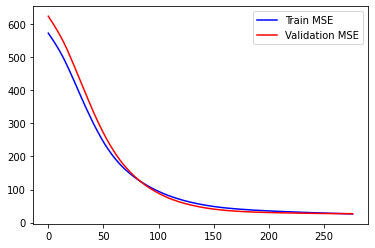

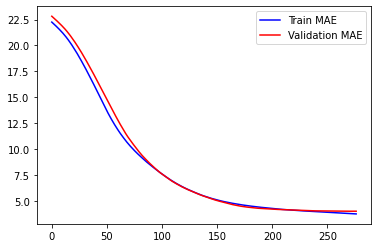

In [41]:
model=reg_model()

history=model.fit(X_train,y_train,epochs=EPOCHS,batch_size=BATCH,validation_split=VAL_SPLIT,callbacks=[callbacks])


#Evaluate the model
epochs=history.epoch
history=history.history

print("Best epoch",epochs[np.argmin(history['val_loss'])])

reg_model_eval(history,epochs)

In [48]:
#Define Huber loss
#NOTE this definition allows you to set and save thresholds when loading the model
def GetHuberLoss(threshold=0.5):
  """
  
  threshold, float - threshold for the loss optimisation, default value is 0.5

  returns a call for a function that can be loaded into keras object
  """

  def HuberLoss(y_true,y_pred):

    """
    #Arguments:
    y_true, array(float/int) - true values
    y_pred, array(float/int) - predicted values
    #Retunrs:
    tf object for the smallest error value

    """

    error=y_true-y_pred

    
    thr=tf.abs(error)<threshold

    squared_loss=tf.square(error)/2
    linear_loss=tf.abs(error)*threshold-threshold**2/2

    return tf.where(thr,squared_loss,linear_loss)

  return HuberLoss

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                140       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 1s 28ms/step - loss: 249.5820 - mean_squared_error: 561.0964 - mean_absolute_error: 22.0938 - val_loss: 260.0095 - val_mean_squared_error: 609.1564 - val_mean_absolute_error: 22.6253
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 247.9327 - mean_squared_error: 557.1915 - mean_absolute_error: 21.9901 - val_loss: 258.4198 - val_mean_squared_error: 605.4406 - val_mean_absolute

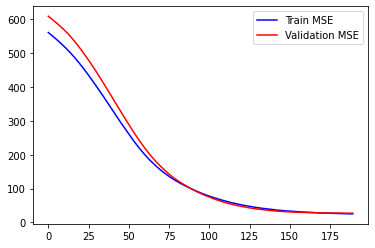

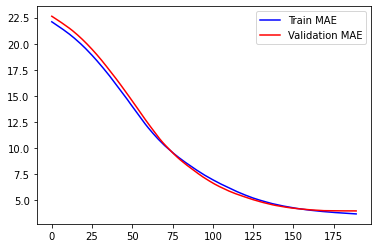

In [60]:
model_customloss=reg_model(custom_loss=GetHuberLoss(20.0))

history=model_customloss.fit(X_train,y_train,epochs=EPOCHS,batch_size=BATCH,validation_split=VAL_SPLIT,callbacks=[callbacks])


#Evaluate the model
epochs=history.epoch
history=history.history

print("Best epoch for the custom loss",epochs[np.argmin(history['val_loss'])])

reg_model_eval(history,epochs)

In [61]:
#Evaluate models

simple_model_results=model.evaluate(X_test, y_test)
y_pred_simple=model.predict(X_test)
print("R2 for the simple model evaluation\n",r2_score(y_test,y_pred_simple),"\n")
print("Simple model results \n",simple_model_results,"]\n")

model_customloss_results=model_customloss.evaluate(X_test, y_test)
y_pred_custom=model_customloss.predict(X_test)
print("R2 for the custom model evaluation\n",r2_score(y_test,y_pred_custom),"\n")
print("custom model results \n",model_customloss_results,"\n")

4/4 [==============================] - 0s 3ms/step - loss: 35.7892 - mean_squared_error: 35.7892 - mean_absolute_error: 3.9083
R2 for the simple model evaluation
 0.6558876321051021 

Simple model results 
 [35.78923416137695, 35.78923416137695, 3.90828013420105] ]

4/4 [==============================] - 0s 3ms/step - loss: 15.5014 - mean_squared_error: 31.6126 - mean_absolute_error: 3.9501
R2 for the custom model evaluation
 0.6960455448878439 

custom model results 
 [15.50137996673584, 31.612632751464844, 3.9501092433929443] 

